In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [198]:
# loading data
o_df = pd.read_csv('population.csv',skiprows=1)
di_df = pd.read_csv('disability.csv',skiprows = 1)

In [200]:
print(di_df.head)

<bound method NDFrame.head of     Table Name  State Code  Distt.Code                     Area Name  \
0          NaN         NaN         NaN                           NaN   
1          NaN         NaN         NaN                           NaN   
2          NaN         NaN         NaN                           NaN   
3        C4920        20.0         0.0               State-JHARKHAND   
4        C4920        20.0         0.0               State-JHARKHAND   
..         ...         ...         ...                           ...   
973      C4920        20.0       369.0  District-Saraikela-Kharsawan   
974      C4920        20.0       369.0  District-Saraikela-Kharsawan   
975      C4920        20.0       369.0  District-Saraikela-Kharsawan   
976      C4920        20.0       369.0  District-Saraikela-Kharsawan   
977      C4920        20.0       369.0  District-Saraikela-Kharsawan   

    Total/Rural/Urban       Age-group Total number of disabled persons  \
0                 NaN          

In [202]:
print(o_df)

     Table State Distt.      Town           Area Name       Age-group  \
0     Name  Code   Code      Code                 NaN             NaN   
1      NaN   NaN    NaN       NaN                 NaN             NaN   
2      NaN   NaN    NaN       NaN                 NaN               1   
3      NaN   NaN    NaN       NaN                 NaN             NaN   
4      NaN   NaN    NaN       NaN                 NaN             NaN   
..     ...   ...    ...       ...                 ...             ...   
494  C4114    20     18  41802000  Jamshedpur (NA+OG)           65-69   
495  C4114    20     18  41802000  Jamshedpur (NA+OG)           70-74   
496  C4114    20     18  41802000  Jamshedpur (NA+OG)           75-79   
497  C4114    20     18  41802000  Jamshedpur (NA+OG)             80+   
498  C4114    20     18  41802000  Jamshedpur (NA+OG)  Age not stated   

      Total  Unnamed: 7 Unnamed: 8    Rural  ... Unnamed: 29 Unnamed: 30  \
0        NaN        NaN        NaN      NaN  ..

## cleaning data

In [205]:
o_df = o_df.dropna(axis = 1, how='all')
o_df.columns

Index(['Table', 'State', 'Distt.', 'Town', 'Area Name', 'Age-group', 'Total ',
       'Unnamed: 7', 'Unnamed: 8', 'Rural', 'Unnamed: 10', 'Unnamed: 11',
       'Urban', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [207]:
co_df = o_df[['Area Name', 'Age-group']]
ru_df = o_df[['Total ','Rural']]
nu_df = pd.concat([co_df,ru_df],axis = 1)
nu_df = nu_df.iloc[5:]

In [209]:
nu_df

,Area Name,Age-group,Total,Rural
5,JHARKHAND,All ages,26945829,20952088
6,JHARKHAND,0-4,3269645,2710437
7,JHARKHAND,5-9,3904096,3198507
8,JHARKHAND,10-14,3534953,2755312
9,JHARKHAND,15-19,2499650,1815202
...,...,...,...,...
494,Jamshedpur (NA+OG),65-69,10666,0
495,Jamshedpur (NA+OG),70-74,7052,0
496,Jamshedpur (NA+OG),75-79,3866,0
497,Jamshedpur (NA+OG),80+,4663,0


In [211]:
nu_df['Area Name'].unique()

array(['JHARKHAND', 'Garhwa *', 'Palamu', 'Chatra *', 'Hazaribag',
       'Hazaribag (M)', 'Kodarma *', 'Giridih', 'Deoghar', 'Godda',
       'Sahibganj', 'Pakaur *', 'Dumka', 'Dhanbad', 'Dhanbad (M)',
       'Bokaro *', 'Bokaro Steel City (CT)', 'Ranchi', 'Ranchi (M Corp.)',
       'Lohardaga', 'Gumla', 'Pashchimi Singhbhum', 'Adityapur (NA)',
       'Purbi Singhbhum', 'Mango (NA)', 'Jamshedpur (NA+OG)'],
      dtype=object)

* match names of districts with the names with other dataset  *

In [214]:
mapping = {
    'JHARKHAND': 'State-JHARKHAND',
    'Garhwa *': 'District-Garhwa',
    'Palamu': 'District-Palamu',
    'Chatra *': 'District-Chatra',
    'Hazaribag': 'District-Hazaribagh',
    'Hazaribag (M)': 'District-Hazaribagh',
    'Kodarma *': 'District-Kodarma',
    'Giridih': 'District-Giridih',
    'Deoghar': 'District-Deoghar',
    'Godda': 'District-Godda',
    'Sahibganj': 'District-Sahibganj',
    'Pakaur *': 'District-Pakur',
    'Dumka': 'District-Dumka',
    'Dhanbad': 'District-Dhanbad',
    'Dhanbad (M)': 'District-Dhanbad',
    'Bokaro *': 'District-Bokaro',
    'Bokaro Steel City (CT)': 'District-Bokaro',
    'Ranchi': 'District-Ranchi',
    'Ranchi (M Corp.)': 'District-Ranchi',
    'Lohardaga': 'District-Lohardaga',
    'Gumla': 'District-Gumla',
    'Pashchimi Singhbhum': 'District-Pashchimi Singhbhum',
    'Adityapur (NA)': 'District-Pashchimi Singhbhum',
    'Purbi Singhbhum': 'District-Purbi Singhbhum',
    'Mango (NA)': 'District-Purbi Singhbhum',
    'Jamshedpur (NA+OG)': 'District-Purbi Singhbhum',
    'Latehar': 'District-Latehar',
    'Ramgarh': 'District-Ramgarh',
    'Jamtara': 'District-Jamtara',
    'Khunti': 'District-Khunti',
    'Simdega': 'District-Simdega',
    'Saraikela-Kharsawan': 'District-Saraikela-Kharsawan'
}


nu_df['Area Name'] = nu_df['Area Name'].replace(mapping)

In [216]:
nu_df['Area Name'].unique()

array(['State-JHARKHAND', 'District-Garhwa', 'District-Palamu',
       'District-Chatra', 'District-Hazaribagh', 'District-Kodarma',
       'District-Giridih', 'District-Deoghar', 'District-Godda',
       'District-Sahibganj', 'District-Pakur', 'District-Dumka',
       'District-Dhanbad', 'District-Bokaro', 'District-Ranchi',
       'District-Lohardaga', 'District-Gumla',
       'District-Pashchimi Singhbhum', 'District-Purbi Singhbhum'],
      dtype=object)

In [218]:
nu_df.head()


,Area Name,Age-group,Total,Rural
5,State-JHARKHAND,All ages,26945829,20952088
6,State-JHARKHAND,0-4,3269645,2710437
7,State-JHARKHAND,5-9,3904096,3198507
8,State-JHARKHAND,10-14,3534953,2755312
9,State-JHARKHAND,15-19,2499650,1815202


In [220]:
nu_df['Age-group'].unique()

array(['All ages', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29',
       '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80+', 'Age not stated'], dtype=object)

In [222]:
nu_df['Area Name'].unique()

array(['State-JHARKHAND', 'District-Garhwa', 'District-Palamu',
       'District-Chatra', 'District-Hazaribagh', 'District-Kodarma',
       'District-Giridih', 'District-Deoghar', 'District-Godda',
       'District-Sahibganj', 'District-Pakur', 'District-Dumka',
       'District-Dhanbad', 'District-Bokaro', 'District-Ranchi',
       'District-Lohardaga', 'District-Gumla',
       'District-Pashchimi Singhbhum', 'District-Purbi Singhbhum'],
      dtype=object)

In [224]:
nu_df[nu_df['Area Name'] == 'District-Bokaro']

,Area Name,Age-group,Total,Rural
290,District-Bokaro,All ages,1777662,973005
291,District-Bokaro,0-4,189029,116973
292,District-Bokaro,5-9,239792,144778
293,District-Bokaro,10-14,232111,126202
294,District-Bokaro,15-19,185371,87376
295,District-Bokaro,20-24,155792,76074
296,District-Bokaro,25-29,140534,77867
297,District-Bokaro,30-34,123689,70722
298,District-Bokaro,35-39,117855,65026
299,District-Bokaro,40-44,96547,49114


In [226]:
nu_df['Total '] = pd.to_numeric(nu_df['Total '], errors='coerce')
nu_df['Rural'] = pd.to_numeric(nu_df['Rural'], errors='coerce')
nu_df = nu_df.groupby(['Area Name', 'Age-group'], as_index=False)[['Total ', 'Rural']].sum()
nu_df

,Area Name,Age-group,Total,Rural
0,District-Bokaro,0-4,220372,116973
1,District-Bokaro,10-14,281436,126202
2,District-Bokaro,15-19,237685,87376
3,District-Bokaro,20-24,199387,76074
4,District-Bokaro,25-29,171006,77867
...,...,...,...,...
356,State-JHARKHAND,70-74,283615,230526
357,State-JHARKHAND,75-79,121585,96378
358,State-JHARKHAND,80+,147960,115897
359,State-JHARKHAND,Age not stated,33308,24438


In [228]:
nu_df.head(20)

,Area Name,Age-group,Total,Rural
0,District-Bokaro,0-4,220372,116973
1,District-Bokaro,10-14,281436,126202
2,District-Bokaro,15-19,237685,87376
3,District-Bokaro,20-24,199387,76074
4,District-Bokaro,25-29,171006,77867
5,District-Bokaro,30-34,146943,70722
6,District-Bokaro,35-39,141250,65026
7,District-Bokaro,40-44,120345,49114
8,District-Bokaro,45-49,120498,42759
9,District-Bokaro,5-9,280986,144778


# working with disability dataset

In [231]:
adi_df = di_df[['Area Name','Age-group','Total/Rural/Urban']]
todi_df = di_df.loc[:,'Total number of disabled persons':'In seeing'].iloc[:,:-1]

In [233]:
todi_df.head(10)

,Total number of disabled persons,Unnamed: 7,Unnamed: 8
0,Persons,Males,Females
1,1,2,3
2,NaN,NaN,NaN
3,"769,980","426,876","343,104"
4,"46,455","24,406","22,049"
5,"67,427","36,416","31,011"
6,"144,770","79,989","64,781"
7,"111,923","63,708","48,215"
8,"95,138","55,563","39,575"
9,"83,172","49,573","33,599"


In [235]:
total_dis_df = pd.concat([adi_df,todi_df],axis = 1)
total_dis_df = total_dis_df[3:].reset_index(drop=True)
total_dis_df

,Area Name,Age-group,Total/Rural/Urban,Total number of disabled persons,Unnamed: 7,Unnamed: 8
0,State-JHARKHAND,Total,Total,"769,980","426,876","343,104"
1,State-JHARKHAND,0-4,Total,"46,455","24,406","22,049"
2,State-JHARKHAND,5-9,Total,"67,427","36,416","31,011"
3,State-JHARKHAND,10-19,Total,"144,770","79,989","64,781"
4,State-JHARKHAND,20-29,Total,"111,923","63,708","48,215"
...,...,...,...,...,...,...
970,District-Saraikela-Kharsawan,60-69,Urban,471,269,202
971,District-Saraikela-Kharsawan,70-79,Urban,246,125,121
972,District-Saraikela-Kharsawan,80-89,Urban,82,33,49
973,District-Saraikela-Kharsawan,90+,Urban,27,13,14


In [237]:
total_dis_df.columns = ['Area Name', 'Age-group','Total/Rural/Urban','People_with_disability_TOTAL','People_with_disability_MALE',
                        'People_with_disability_FEMALE']
total_dis_df.head(50)

,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL,People_with_disability_MALE,People_with_disability_FEMALE
0,State-JHARKHAND,Total,Total,"769,980","426,876","343,104"
1,State-JHARKHAND,0-4,Total,"46,455","24,406","22,049"
2,State-JHARKHAND,5-9,Total,"67,427","36,416","31,011"
3,State-JHARKHAND,10-19,Total,"144,770","79,989","64,781"
4,State-JHARKHAND,20-29,Total,"111,923","63,708","48,215"
5,State-JHARKHAND,30-39,Total,"95,138","55,563","39,575"
6,State-JHARKHAND,40-49,Total,"83,172","49,573","33,599"
7,State-JHARKHAND,50-59,Total,"70,032","39,482","30,550"
8,State-JHARKHAND,60-69,Total,"82,083","42,582","39,501"
9,State-JHARKHAND,70-79,Total,"45,933","23,450","22,483"


<Axes: >

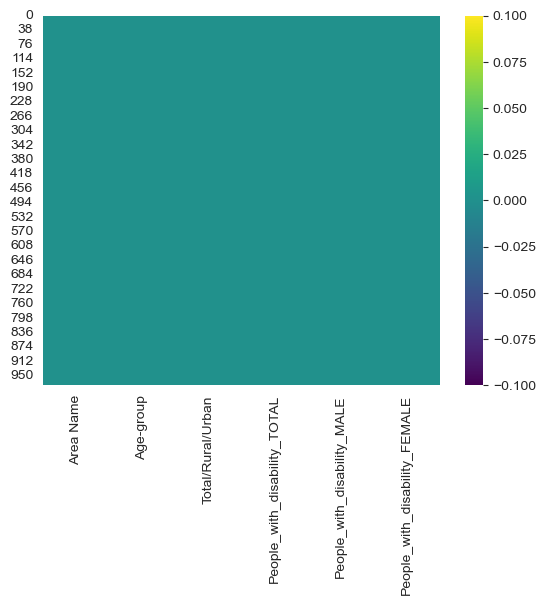

In [239]:
sns.heatmap(total_dis_df.isnull(),cmap='viridis')

In [241]:
total_dis_df.isnull()

,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL,People_with_disability_MALE,People_with_disability_FEMALE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
970,False,False,False,False,False,False
971,False,False,False,False,False,False
972,False,False,False,False,False,False
973,False,False,False,False,False,False


In [243]:
total_dis_df.head(20)

,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL,People_with_disability_MALE,People_with_disability_FEMALE
0,State-JHARKHAND,Total,Total,"769,980","426,876","343,104"
1,State-JHARKHAND,0-4,Total,"46,455","24,406","22,049"
2,State-JHARKHAND,5-9,Total,"67,427","36,416","31,011"
3,State-JHARKHAND,10-19,Total,"144,770","79,989","64,781"
4,State-JHARKHAND,20-29,Total,"111,923","63,708","48,215"
5,State-JHARKHAND,30-39,Total,"95,138","55,563","39,575"
6,State-JHARKHAND,40-49,Total,"83,172","49,573","33,599"
7,State-JHARKHAND,50-59,Total,"70,032","39,482","30,550"
8,State-JHARKHAND,60-69,Total,"82,083","42,582","39,501"
9,State-JHARKHAND,70-79,Total,"45,933","23,450","22,483"


In [245]:
total_dis_df.describe().transpose()

,count,unique,top,freq
Area Name,975,25,State-JHARKHAND,39
Age-group,975,13,Total,75
Total/Rural/Urban,975,3,Total,325
People_with_disability_TOTAL,975,816,6,6
People_with_disability_MALE,975,745,0,13
People_with_disability_FEMALE,975,729,1,12


In [247]:
total_dis_df['Area Name'].unique()

array(['State-JHARKHAND', 'District-Garhwa ', 'District-Chatra',
       'District-Kodarma', 'District-Giridih', 'District-Deoghar',
       'District-Godda', 'District-Sahibganj', 'District-Pakur',
       'District-Dhanbad', 'District-Bokaro', 'District-Lohardaga',
       'District-Purbi Singhbhum', 'District-Palamu', 'District-Latehar',
       'District-Hazaribagh', 'District-Ramgarh', 'District-Dumka',
       'District-Jamtara', 'District-Ranchi', 'District-Khunti',
       'District-Gumla', 'District-Simdega',
       'District-Pashchimi Singhbhum', 'District-Saraikela-Kharsawan'],
      dtype=object)

In [249]:
total_dis_df['Age-group'].unique()

array(['Total', '0-4', '5-9', '10-19', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80-89', '90+', 'Age Not Stated'], dtype=object)

### Fixing the age-group column in population dataset and disability dataset too 

In [252]:
nu_df['Age-group'].unique()

array(['0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '5-9', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80+', 'Age not stated', 'All ages'],
      dtype=object)

In [254]:
age_group_map = {
    'All ages': 'Total',
    '0-4': '0-4',
    '5-9': '5-9',
    '10-14': '10-19',
    '15-19': '10-19',
    '20-24': '20-29',
    '25-29': '20-29',
    '30-34': '30-39',
    '35-39': '30-39',
    '40-44': '40-49',
    '45-49': '40-49',
    '50-54': '50-59',
    '55-59': '50-59',
    '60-64': '60-69',
    '65-69': '60-69',
    '70-74': '70-79',
    '75-79': '70-79',
    '80+': '80+',
    'Age not stated': 'Age Not Stated'
}
nu_df['Age-group'] = nu_df['Age-group'].replace(age_group_map)
nu_df

,Area Name,Age-group,Total,Rural
0,District-Bokaro,0-4,220372,116973
1,District-Bokaro,10-19,281436,126202
2,District-Bokaro,10-19,237685,87376
3,District-Bokaro,20-29,199387,76074
4,District-Bokaro,20-29,171006,77867
...,...,...,...,...
356,State-JHARKHAND,70-79,283615,230526
357,State-JHARKHAND,70-79,121585,96378
358,State-JHARKHAND,80+,147960,115897
359,State-JHARKHAND,Age Not Stated,33308,24438


In [256]:
nu_df.columns

Index(['Area Name', 'Age-group', 'Total ', 'Rural'], dtype='object')

In [258]:
nu_df = nu_df.groupby(['Area Name', 'Age-group'], as_index=False)[['Total ','Rural']].sum()
nu_df.head(20)


,Area Name,Age-group,Total,Rural
0,District-Bokaro,0-4,220372,116973
1,District-Bokaro,10-19,519121,213578
2,District-Bokaro,20-29,370393,153941
3,District-Bokaro,30-39,288193,135748
4,District-Bokaro,40-49,240843,91873
5,District-Bokaro,5-9,280986,144778
6,District-Bokaro,50-59,153315,58049
7,District-Bokaro,60-69,62121,37904
8,District-Bokaro,70-79,24352,14184
9,District-Bokaro,80+,10304,5187


In [260]:
# for disability set
total_dis_df['Age-group'].unique()

array(['Total', '0-4', '5-9', '10-19', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80-89', '90+', 'Age Not Stated'], dtype=object)

In [262]:
print(total_dis_df["People_with_disability_TOTAL"].dtype)

object


In [264]:
total_dis_df["People_with_disability_TOTAL"] = (
    total_dis_df["People_with_disability_TOTAL"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
)

total_dis_df["People_with_disability_MALE"] = (
    total_dis_df["People_with_disability_MALE"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
)

total_dis_df["People_with_disability_FEMALE"] = (
    total_dis_df["People_with_disability_FEMALE"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
)
total_dis_df["People_with_disability_TOTAL"] = pd.to_numeric(total_dis_df["People_with_disability_TOTAL"], errors='coerce')
total_dis_df["People_with_disability_MALE"] = pd.to_numeric(total_dis_df["People_with_disability_MALE"], errors='coerce')
total_dis_df["People_with_disability_FEMALE"] = pd.to_numeric(total_dis_df["People_with_disability_FEMALE"], errors='coerce')


In [266]:
age_merge2 = {'80-89':'80+',
            '90+':'80+'}
total_dis_df['Age-group'] = total_dis_df['Age-group'].replace(age_merge2)
total_dis_df = total_dis_df.groupby(["Area Name","Age-group","Total/Rural/Urban"],as_index=False)[["People_with_disability_TOTAL","People_with_disability_MALE","People_with_disability_FEMALE"]].sum()
total_dis_df.reset_index()

,index,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL,People_with_disability_MALE,People_with_disability_FEMALE
0,0,District-Bokaro,0-4,Rural,2664,1364,1300
1,1,District-Bokaro,0-4,Total,4518,2343,2175
2,2,District-Bokaro,0-4,Urban,1854,979,875
3,3,District-Bokaro,10-19,Rural,7997,4266,3731
4,4,District-Bokaro,10-19,Total,14354,7796,6558
...,...,...,...,...,...,...,...
895,895,State-JHARKHAND,Age Not Stated,Total,3379,1874,1505
896,896,State-JHARKHAND,Age Not Stated,Urban,1678,932,746
897,897,State-JHARKHAND,Total,Rural,597544,328696,268848
898,898,State-JHARKHAND,Total,Total,769980,426876,343104


In [268]:
# dropping the districts which are not present in population dataset
districts_to_drop = [
    'District-Latehar',
    'District-Ramgarh',
    'District-Jamtara',
    'District-Khunti',
    'District-Simdega',
    'District-Saraikela-Kharsawan'
]
total_dis_df = total_dis_df[~total_dis_df['Area Name'].isin(districts_to_drop)]

# Total disabled data for analysis

In [271]:
# creating relevant dataset
total_a_df = total_dis_df.loc[:,:'People_with_disability_TOTAL']

In [273]:
total_a_df.head()

,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL
0,District-Bokaro,0-4,Rural,2664
1,District-Bokaro,0-4,Total,4518
2,District-Bokaro,0-4,Urban,1854
3,District-Bokaro,10-19,Rural,7997
4,District-Bokaro,10-19,Total,14354


In [275]:
total_a_df = total_a_df[(total_a_df['Age-group']=='Total')&(total_a_df['Total/Rural/Urban']=='Total')].reset_index()
total_a_df

,index,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL
0,34,District-Bokaro,Total,Total,70261
1,70,District-Chatra,Total,Total,17699
2,106,District-Deoghar,Total,Total,47613
3,142,District-Dhanbad,Total,Total,67300
4,178,District-Dumka,Total,Total,34686
5,214,District-Garhwa,Total,Total,26271
6,250,District-Giridih,Total,Total,49208
7,286,District-Godda,Total,Total,51496
8,322,District-Gumla,Total,Total,18977
9,358,District-Hazaribagh,Total,Total,35132


In [277]:
nu_df

,Area Name,Age-group,Total,Rural
0,District-Bokaro,0-4,220372,116973
1,District-Bokaro,10-19,519121,213578
2,District-Bokaro,20-29,370393,153941
3,District-Bokaro,30-39,288193,135748
4,District-Bokaro,40-49,240843,91873
...,...,...,...,...
223,State-JHARKHAND,60-69,1025502,832189
224,State-JHARKHAND,70-79,405200,326904
225,State-JHARKHAND,80+,147960,115897
226,State-JHARKHAND,Age Not Stated,33308,24438


In [279]:
nu_df['Area Name'].unique()

array(['District-Bokaro', 'District-Chatra', 'District-Deoghar',
       'District-Dhanbad', 'District-Dumka', 'District-Garhwa',
       'District-Giridih', 'District-Godda', 'District-Gumla',
       'District-Hazaribagh', 'District-Kodarma', 'District-Lohardaga',
       'District-Pakur', 'District-Palamu',
       'District-Pashchimi Singhbhum', 'District-Purbi Singhbhum',
       'District-Ranchi', 'District-Sahibganj', 'State-JHARKHAND'],
      dtype=object)

In [281]:
total_a_df['Area Name'].unique()

array(['District-Bokaro', 'District-Chatra', 'District-Deoghar',
       'District-Dhanbad', 'District-Dumka', 'District-Garhwa ',
       'District-Giridih', 'District-Godda', 'District-Gumla',
       'District-Hazaribagh', 'District-Kodarma', 'District-Lohardaga',
       'District-Pakur', 'District-Palamu',
       'District-Pashchimi Singhbhum', 'District-Purbi Singhbhum',
       'District-Ranchi', 'District-Sahibganj', 'State-JHARKHAND'],
      dtype=object)

In [283]:
nu_df_tot = nu_df[nu_df['Age-group'] == 'Total'].reset_index()
nu_df_tot = nu_df_tot[['Area Name','Age-group','Total ']].reset_index()

In [285]:
ana_tot_df = pd.merge(nu_df_tot,total_a_df , on=['Area Name','Age-group'] )
ana_tot_df.drop(columns=['index_x','index_y','Total/Rural/Urban'], inplace=True)
ana_tot_df['disability percentage'] =(ana_tot_df['People_with_disability_TOTAL'] / ana_tot_df['Total '] * 100).round(2)
ana_tot_df

,Area Name,Age-group,Total,People_with_disability_TOTAL,disability percentage
0,District-Bokaro,Total,2171467,70261,3.24
1,District-Chatra,Total,791434,17699,2.24
2,District-Deoghar,Total,1165390,47613,4.09
3,District-Dhanbad,Total,2596360,67300,2.59
4,District-Dumka,Total,1759602,34686,1.97
5,District-Giridih,Total,1904430,49208,2.58
6,District-Godda,Total,1047939,51496,4.91
7,District-Gumla,Total,1346767,18977,1.41
8,District-Hazaribagh,Total,2404744,35132,1.46
9,District-Kodarma,Total,499403,10195,2.04


# Rural disability data for analysis

In [288]:
rural_a_df = total_dis_df.loc[:,:'People_with_disability_TOTAL']
rural_a_df = rural_a_df[(rural_a_df['Age-group']=='Total')&(rural_a_df['Total/Rural/Urban']=='Rural')].reset_index()

In [290]:
rural_a_df

,index,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL
0,33,District-Bokaro,Total,Rural,38280
1,69,District-Chatra,Total,Rural,16643
2,105,District-Deoghar,Total,Rural,39410
3,141,District-Dhanbad,Total,Rural,29339
4,177,District-Dumka,Total,Rural,32463
5,213,District-Garhwa,Total,Rural,25202
6,249,District-Giridih,Total,Rural,45559
7,285,District-Godda,Total,Rural,49925
8,321,District-Gumla,Total,Rural,17846
9,357,District-Hazaribagh,Total,Rural,29563


In [292]:
nu_df_rur = nu_df[nu_df['Age-group'] == 'Total'].reset_index()
nu_df_rur = nu_df_rur[['Area Name','Age-group','Rural']]
nu_df_rur

,Area Name,Age-group,Rural
0,District-Bokaro,Total,973005
1,District-Chatra,Total,749414
2,District-Deoghar,Total,1005539
3,District-Dhanbad,Total,1141744
4,District-Dumka,Total,1644690
5,District-Garhwa,Total,992825
6,District-Giridih,Total,1782066
7,District-Godda,Total,1010931
8,District-Gumla,Total,1273025
9,District-Hazaribagh,Total,1748406


In [294]:
ana_rur_df = pd.merge(rural_a_df,nu_df_rur, on=['Area Name', 'Age-group']).reset_index()
ana_rur_df = ana_rur_df.drop(columns = ['level_0','index'])
ana_rur_df['Disability_percentage'] = (ana_rur_df['People_with_disability_TOTAL']/ana_rur_df['Rural']*100).round(2)
ana_rur_df

,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL,Rural,Disability_percentage
0,District-Bokaro,Total,Rural,38280,973005,3.93
1,District-Chatra,Total,Rural,16643,749414,2.22
2,District-Deoghar,Total,Rural,39410,1005539,3.92
3,District-Dhanbad,Total,Rural,29339,1141744,2.57
4,District-Dumka,Total,Rural,32463,1644690,1.97
5,District-Giridih,Total,Rural,45559,1782066,2.56
6,District-Godda,Total,Rural,49925,1010931,4.94
7,District-Gumla,Total,Rural,17846,1273025,1.40
8,District-Hazaribagh,Total,Rural,29563,1748406,1.69
9,District-Kodarma,Total,Rural,8219,412654,1.99


# Final analysis 

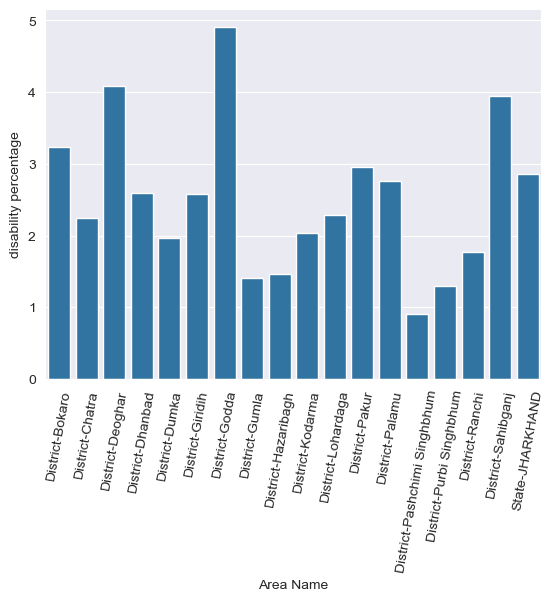

<Figure size 1000x1800 with 0 Axes>

In [297]:
sns.set_style('darkgrid')
sns.barplot(x = 'Area Name', y = 'disability percentage',data=ana_tot_df)
plt.xticks(rotation = 80)
plt.figure(figsize=(10,18))
plt.show()

In [299]:
ana_tot_df.sort_values(by=['disability percentage'], ascending= False )

,Area Name,Age-group,Total,People_with_disability_TOTAL,disability percentage
6,District-Godda,Total,1047939,51496,4.91
2,District-Deoghar,Total,1165390,47613,4.09
16,District-Sahibganj,Total,927770,36613,3.95
0,District-Bokaro,Total,2171467,70261,3.24
11,District-Pakur,Total,701664,20760,2.96
17,State-JHARKHAND,Total,26945829,769980,2.86
12,District-Palamu,Total,2098359,57997,2.76
3,District-Dhanbad,Total,2596360,67300,2.59
5,District-Giridih,Total,1904430,49208,2.58
10,District-Lohardaga,Total,364521,8356,2.29


In [301]:
ana_rur_df.head()

,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL,Rural,Disability_percentage
0,District-Bokaro,Total,Rural,38280,973005,3.93
1,District-Chatra,Total,Rural,16643,749414,2.22
2,District-Deoghar,Total,Rural,39410,1005539,3.92
3,District-Dhanbad,Total,Rural,29339,1141744,2.57
4,District-Dumka,Total,Rural,32463,1644690,1.97


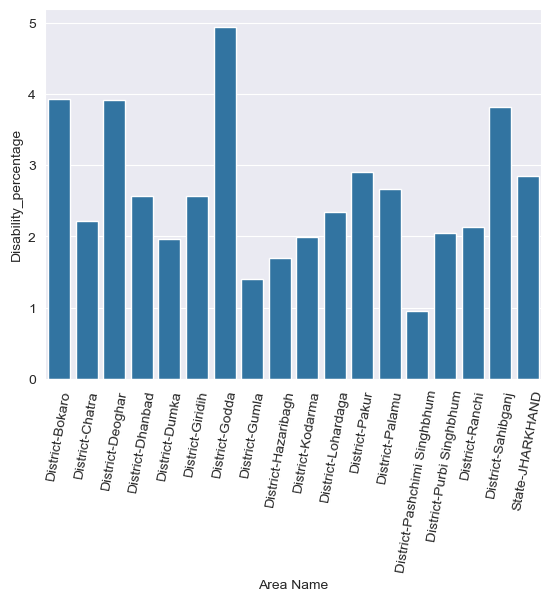

<Figure size 1000x1800 with 0 Axes>

In [303]:
sns.set_style('darkgrid')
sns.barplot(x = 'Area Name', y = 'Disability_percentage',data=ana_rur_df)
plt.xticks(rotation = 80)
plt.figure(figsize=(10,18))
plt.show()

In [305]:
total_dis_df

,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL,People_with_disability_MALE,People_with_disability_FEMALE
0,District-Bokaro,0-4,Rural,2664,1364,1300
1,District-Bokaro,0-4,Total,4518,2343,2175
2,District-Bokaro,0-4,Urban,1854,979,875
3,District-Bokaro,10-19,Rural,7997,4266,3731
4,District-Bokaro,10-19,Total,14354,7796,6558
...,...,...,...,...,...,...
895,State-JHARKHAND,Age Not Stated,Total,3379,1874,1505
896,State-JHARKHAND,Age Not Stated,Urban,1678,932,746
897,State-JHARKHAND,Total,Rural,597544,328696,268848
898,State-JHARKHAND,Total,Total,769980,426876,343104


In [307]:
final_df = total_dis_df[total_dis_df['Total/Rural/Urban']== 'Rural']
final_df = final_df[['Area Name','Age-group','Total/Rural/Urban','People_with_disability_TOTAL']]
final_df

,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL
0,District-Bokaro,0-4,Rural,2664
3,District-Bokaro,10-19,Rural,7997
6,District-Bokaro,20-29,Rural,5897
9,District-Bokaro,30-39,Rural,5170
12,District-Bokaro,40-49,Rural,4036
...,...,...,...,...
885,State-JHARKHAND,60-69,Rural,68296
888,State-JHARKHAND,70-79,Rural,39041
891,State-JHARKHAND,80+,Rural,16417
894,State-JHARKHAND,Age Not Stated,Rural,1701


In [309]:
nu_df_rur

,Area Name,Age-group,Rural
0,District-Bokaro,Total,973005
1,District-Chatra,Total,749414
2,District-Deoghar,Total,1005539
3,District-Dhanbad,Total,1141744
4,District-Dumka,Total,1644690
5,District-Garhwa,Total,992825
6,District-Giridih,Total,1782066
7,District-Godda,Total,1010931
8,District-Gumla,Total,1273025
9,District-Hazaribagh,Total,1748406


In [311]:
final_ana_df = pd.merge(nu_df,final_df, on = ['Area Name', 'Age-group'])
final_ana_df.drop(columns='Total ',inplace=True)
final_ana_df

,Area Name,Age-group,Rural,Total/Rural/Urban,People_with_disability_TOTAL
0,District-Bokaro,0-4,116973,Rural,2664
1,District-Bokaro,10-19,213578,Rural,7997
2,District-Bokaro,20-29,153941,Rural,5897
3,District-Bokaro,30-39,135748,Rural,5170
4,District-Bokaro,40-49,91873,Rural,4036
...,...,...,...,...,...
211,State-JHARKHAND,60-69,832189,Rural,68296
212,State-JHARKHAND,70-79,326904,Rural,39041
213,State-JHARKHAND,80+,115897,Rural,16417
214,State-JHARKHAND,Age Not Stated,24438,Rural,1701


In [436]:
final_ana_df['Disability_percentage'] = (final_ana_df['People_with_disability_TOTAL']/final_ana_df['Rural']*100).round(2)
final_ana_df = final_ana_df[~(final_ana_df['Age-group']=='Age Not Stated')]
final_ana_df['Area Name'].unique()

array(['District-Bokaro', 'District-Chatra', 'District-Deoghar',
       'District-Dhanbad', 'District-Dumka', 'District-Giridih',
       'District-Godda', 'District-Gumla', 'District-Hazaribagh',
       'District-Kodarma', 'District-Lohardaga', 'District-Pakur',
       'District-Palamu', 'District-Pashchimi Singhbhum',
       'District-Purbi Singhbhum', 'District-Ranchi',
       'District-Sahibganj', 'State-JHARKHAND'], dtype=object)

# line plot

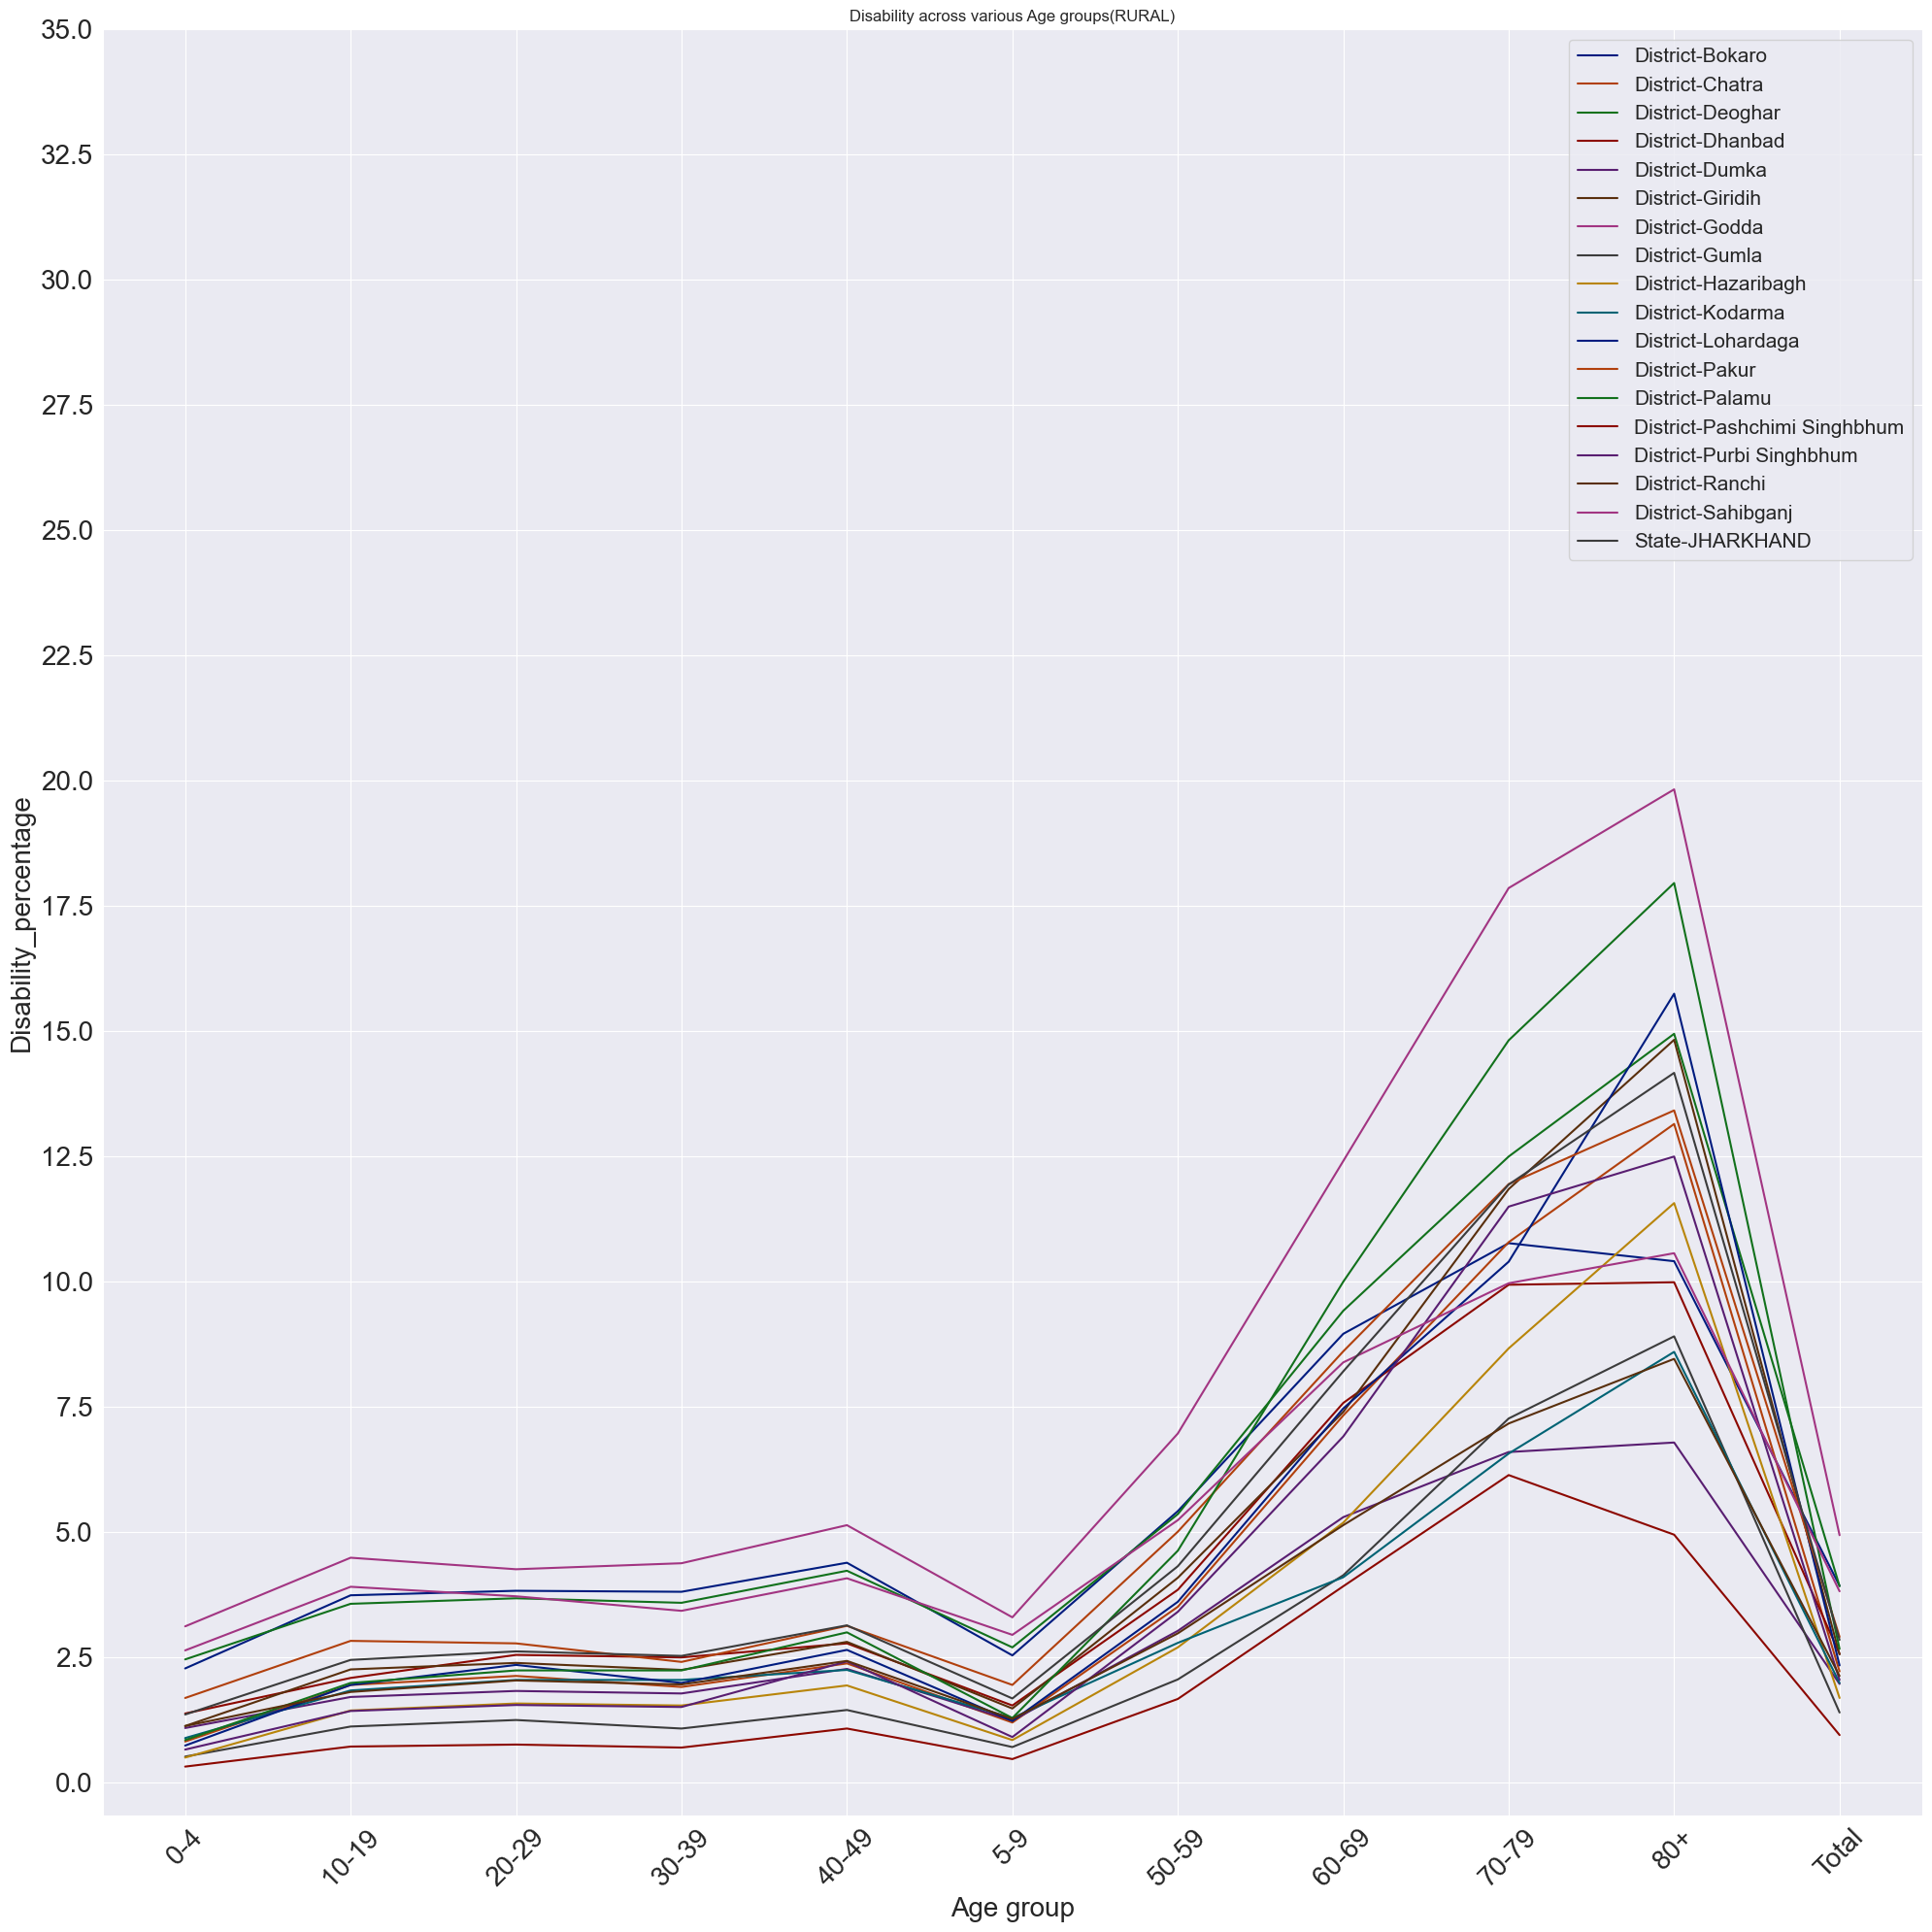

In [432]:
plt.figure(figsize=(20,20))
sns.lineplot(x = 'Age-group', y='Disability_percentage',hue='Area Name',data=final_ana_df,palette='dark')
plt.xticks(rotation = 45)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Age group',fontsize = 20)
plt.ylabel('Disability_percentage',fontsize = 20)
plt.title('Disability across various Age groups(RURAL)')
plt.legend(fontsize=15)
plt.tight_layout()
#plt.xticks(['0-4','5-6','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+'])
plt.yticks([0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0])
plt.show()

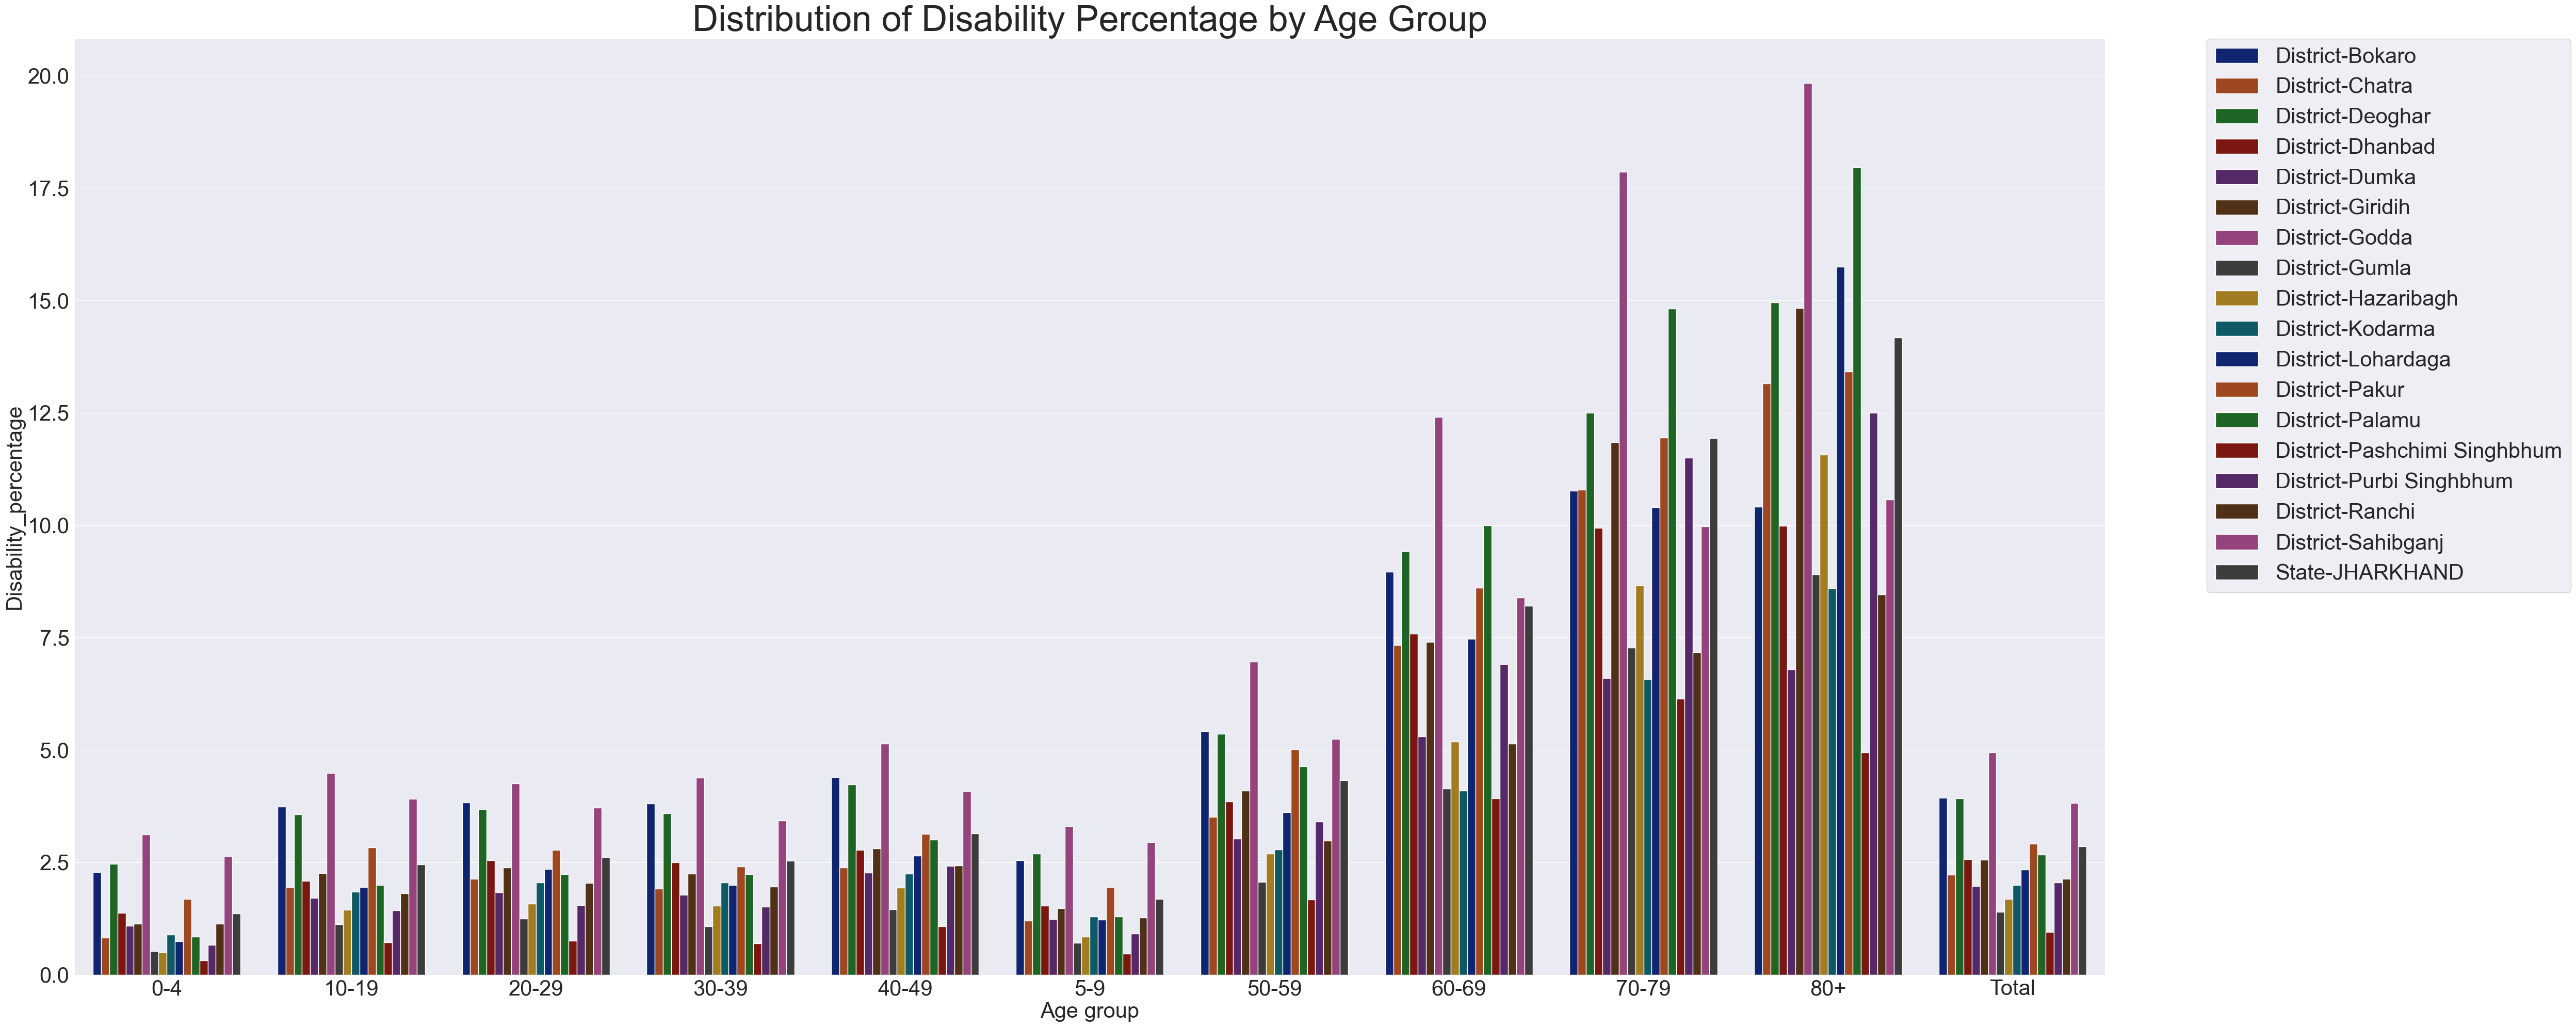

In [418]:
plt.figure(figsize=(50, 20))
sns.barplot(x='Age-group', y='Disability_percentage', hue='Area Name', data=final_ana_df, palette='dark')
plt.title('Distribution of Disability Percentage by Age Group',fontsize = 50)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Age group',fontsize = 30)
plt.ylabel('Disability_percentage',fontsize = 30)
plt.tight_layout()
plt.show()

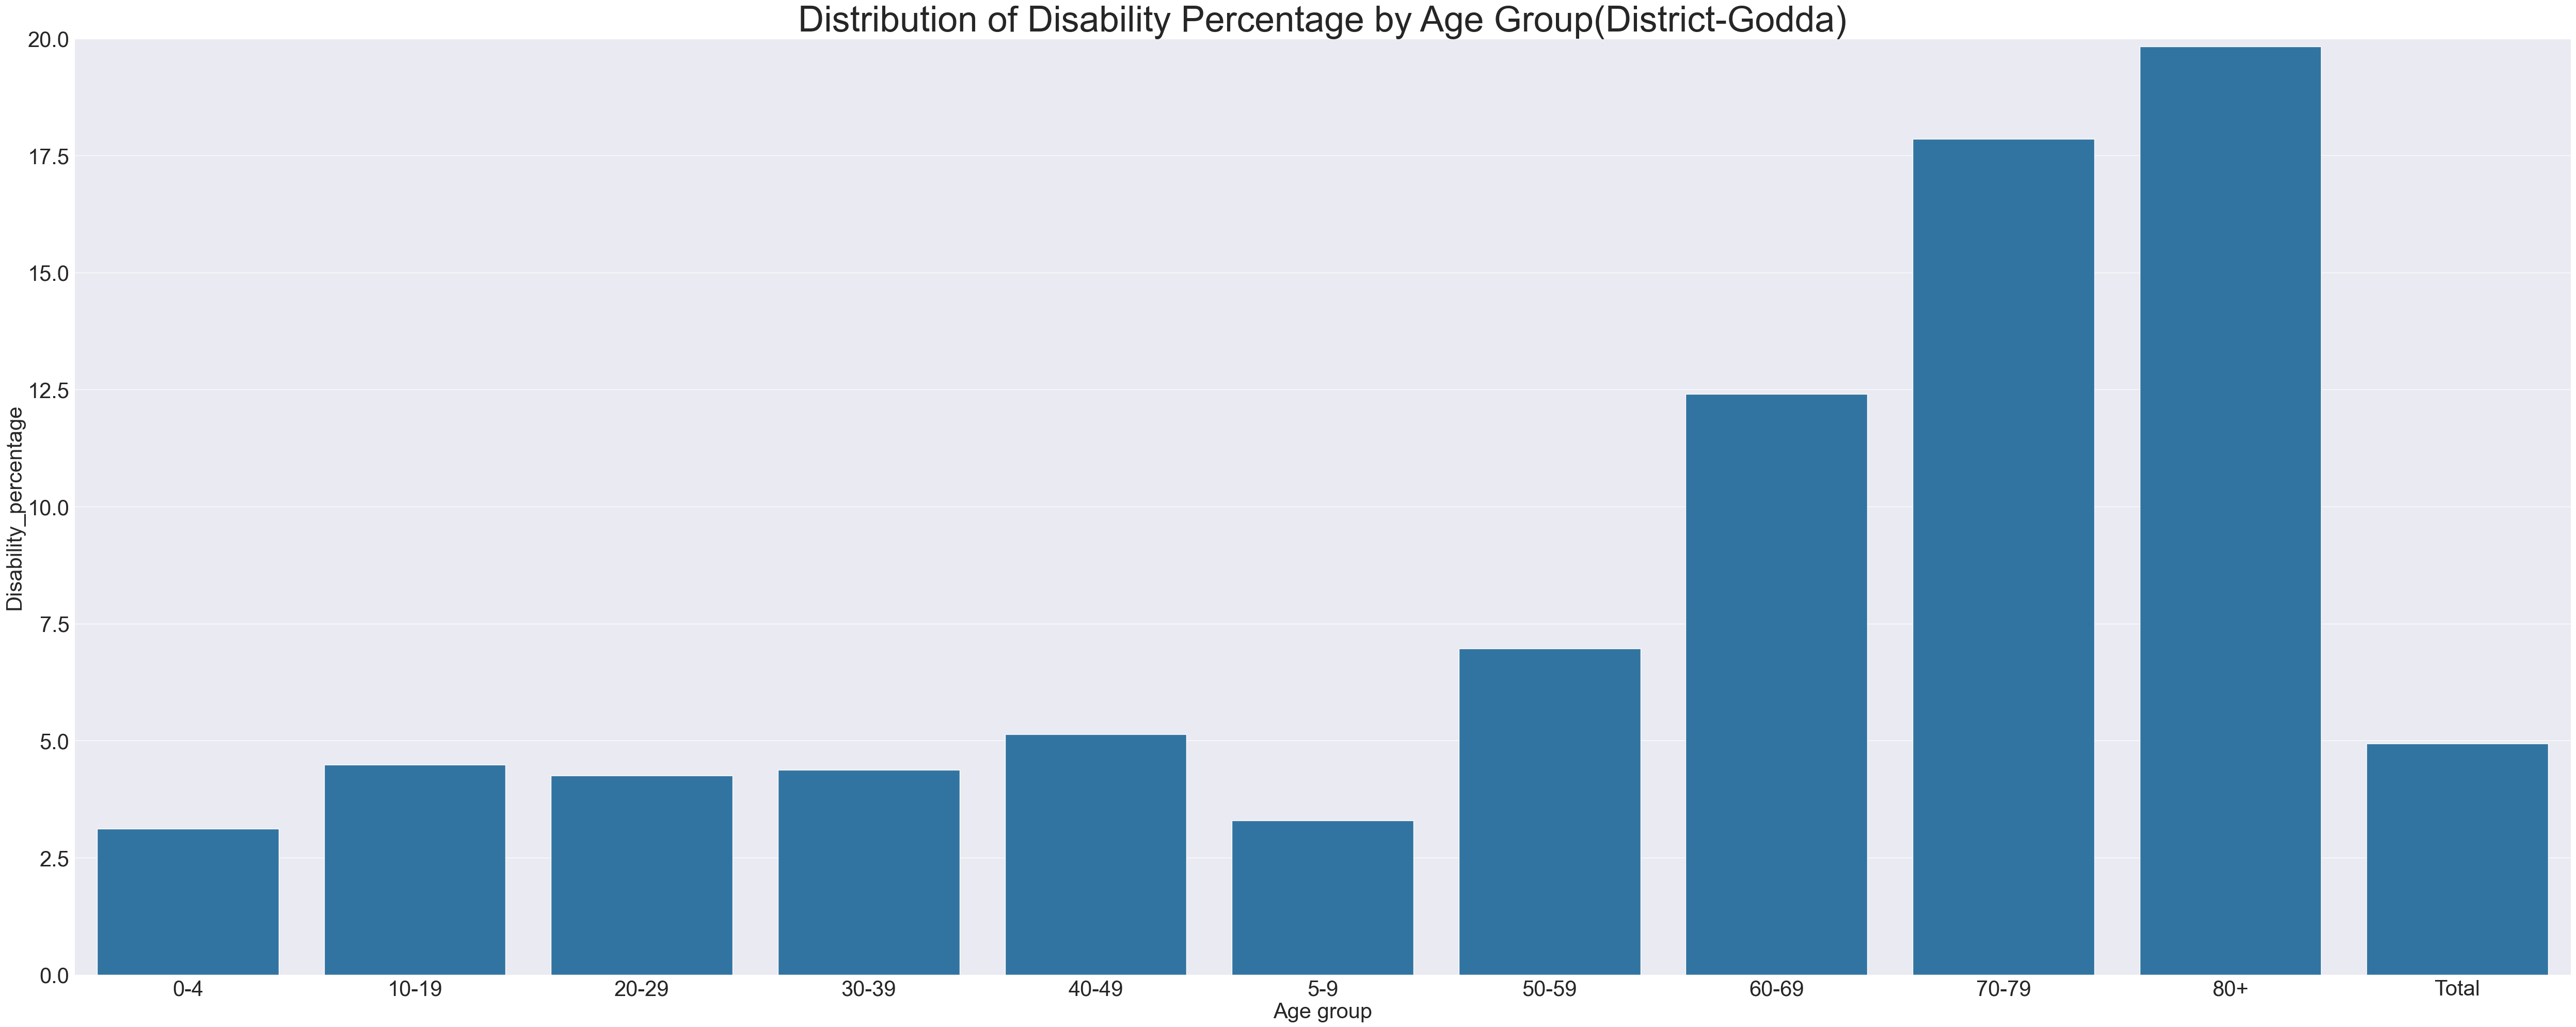

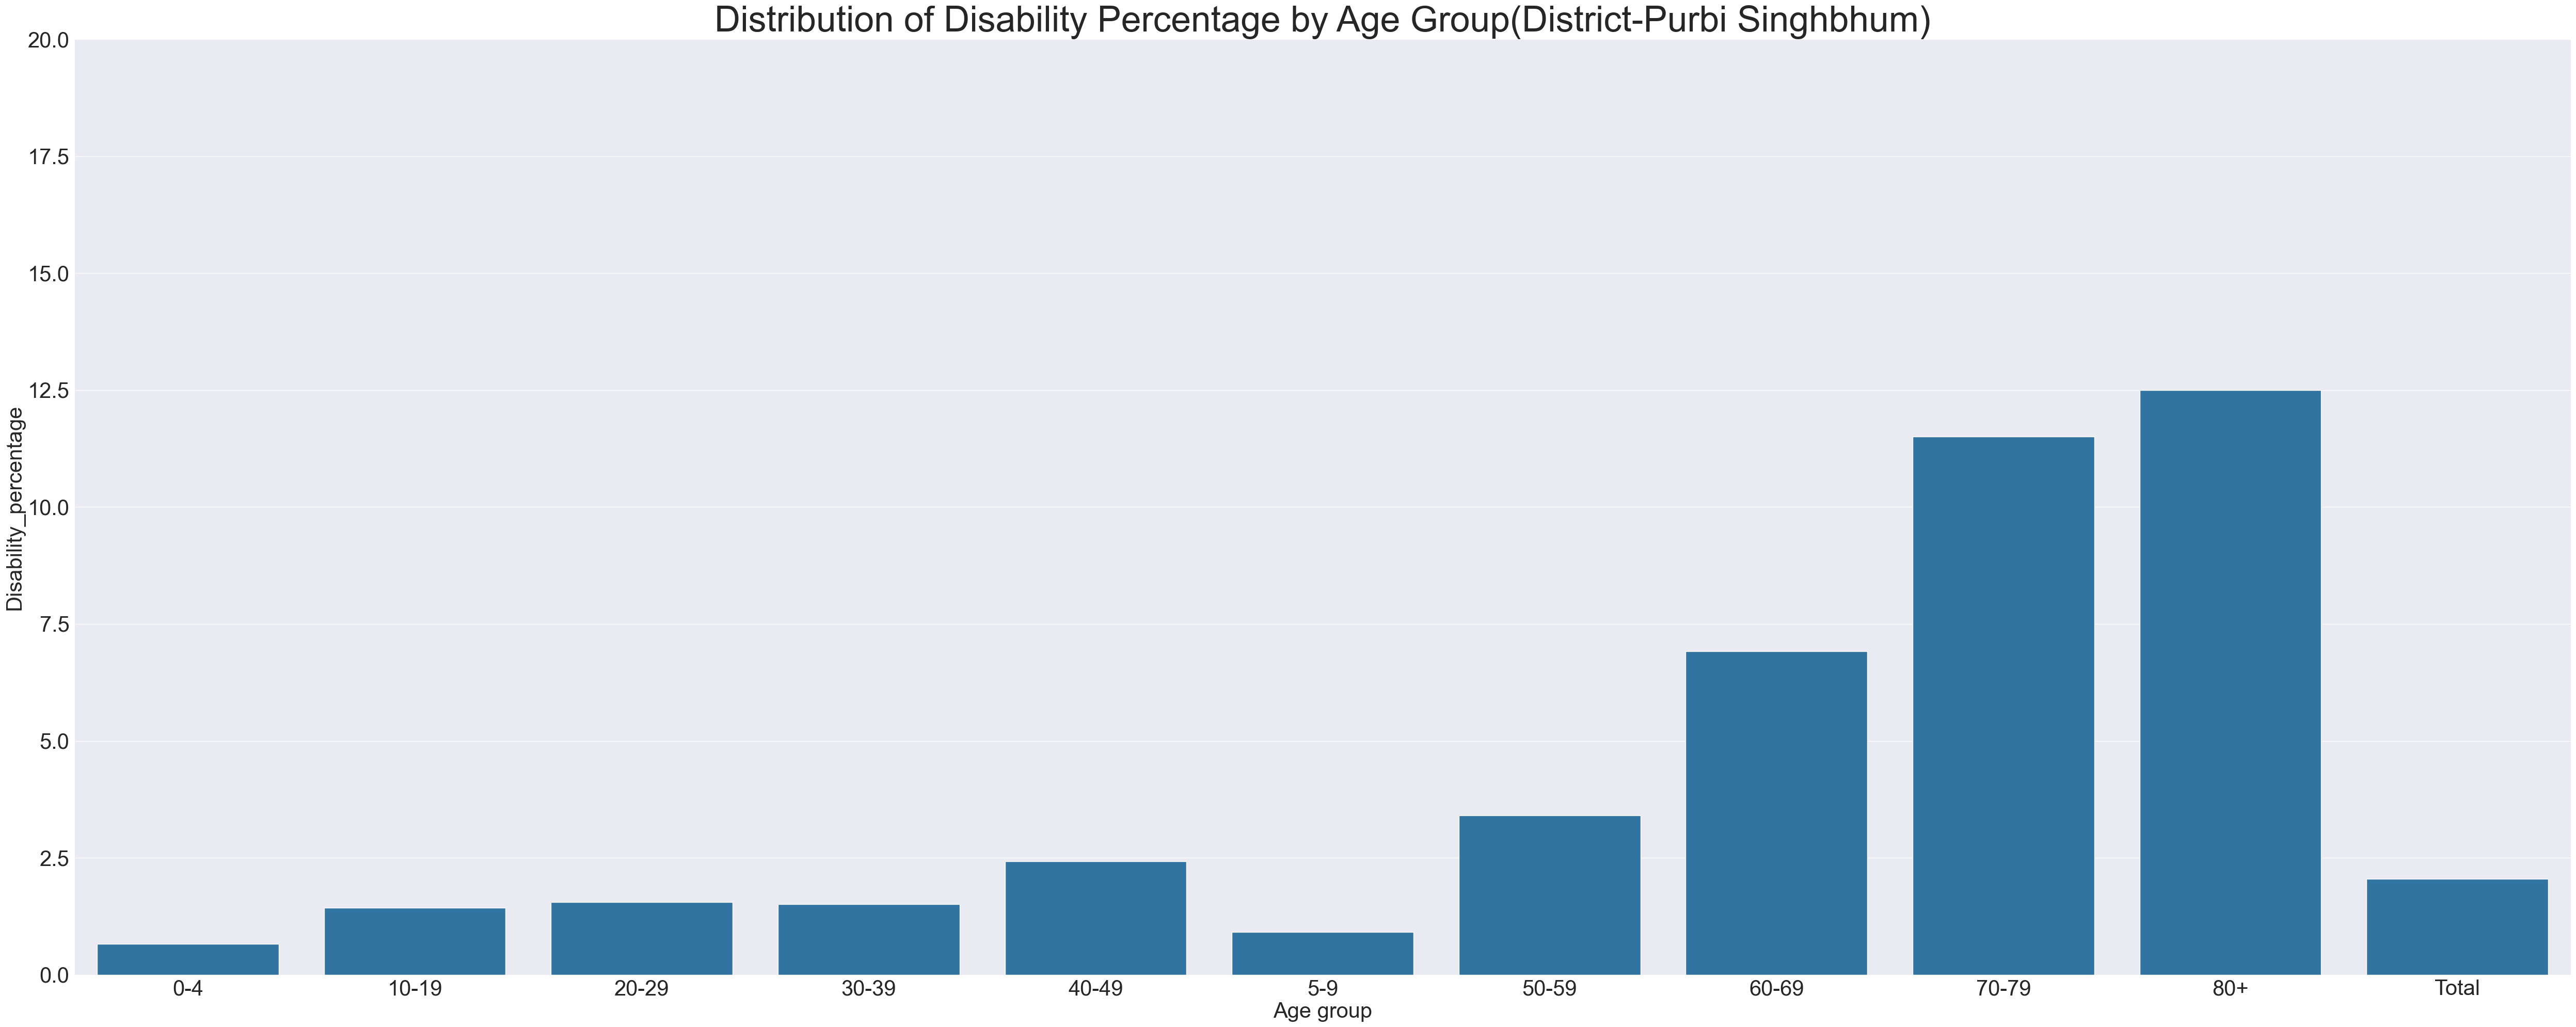

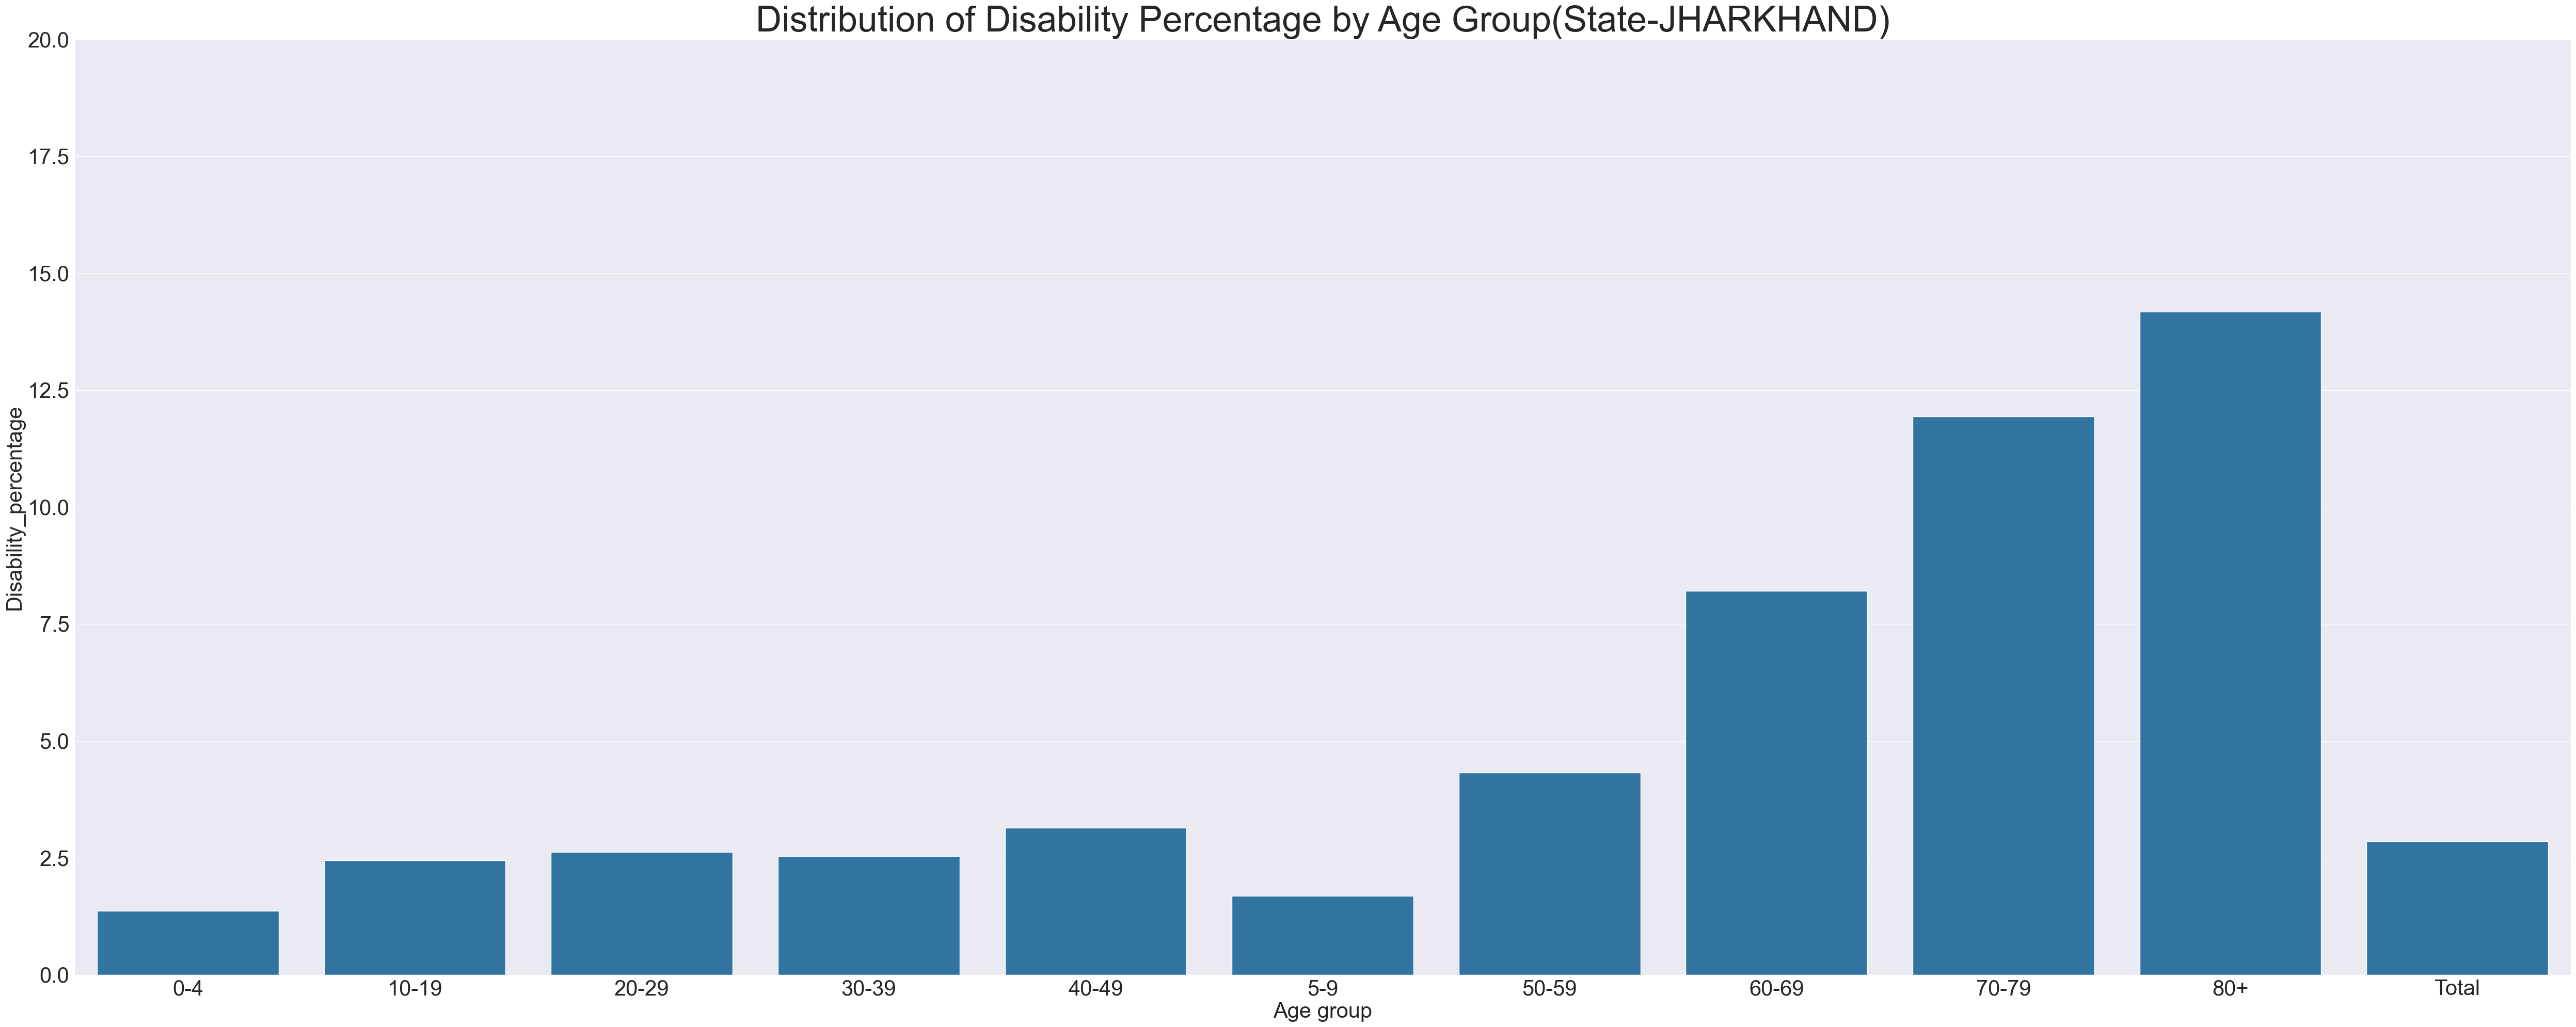

In [450]:
districts = ['District-Godda','District-Purbi Singhbhum','State-JHARKHAND']
for district in districts:
    plt.figure(figsize=(50, 20))
    sns.barplot(x='Age-group', y='Disability_percentage', data=final_ana_df[final_ana_df['Area Name']==f"{district}"])
    plt.title(f'Distribution of Disability Percentage by Age Group({district})',fontsize = 50)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.ylim(0,20)
    plt.xlabel('Age group',fontsize = 30)
    plt.ylabel('Disability_percentage',fontsize = 30)
    plt.tight_layout()
    plt.show()

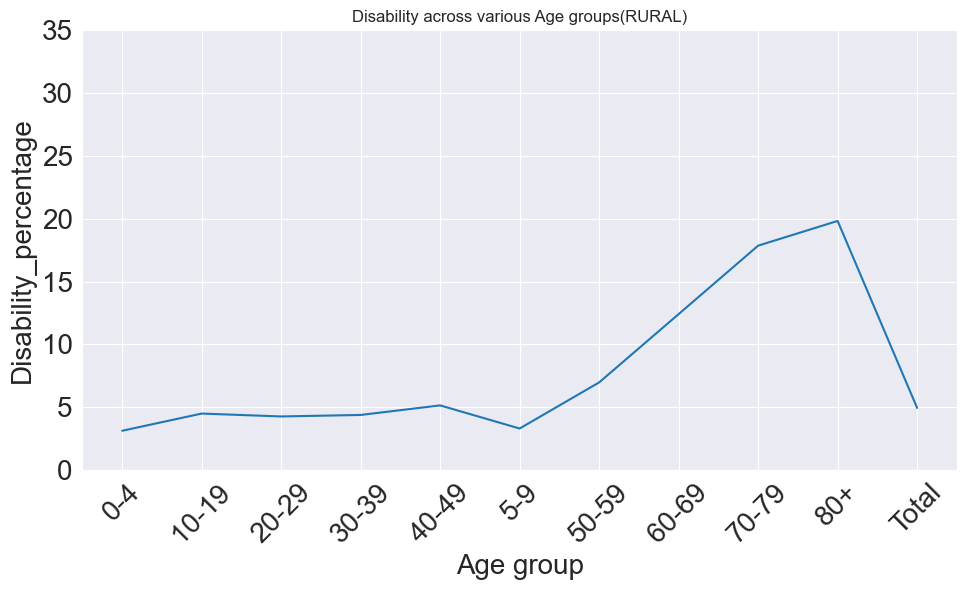

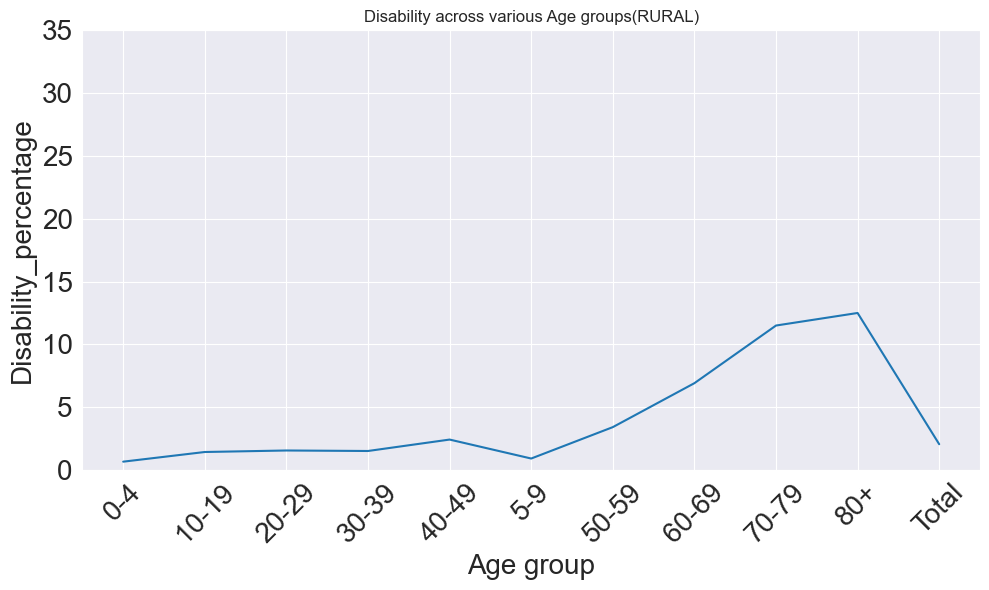

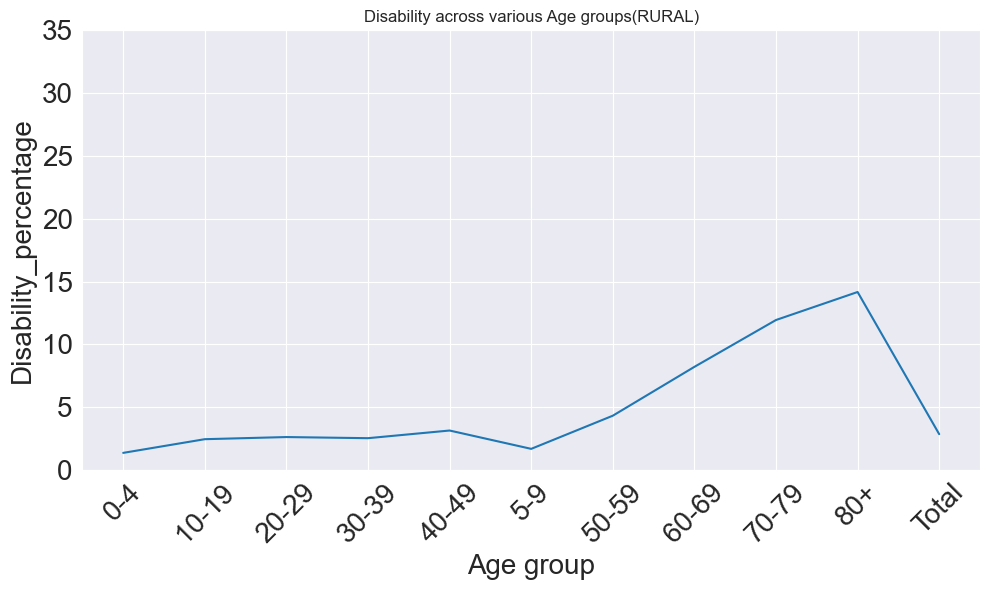

In [460]:
for district in districts:
    plt.figure(figsize=(10,6))
    sns.lineplot(x = 'Age-group', y='Disability_percentage',data=final_ana_df[final_ana_df['Area Name']== f'{district}'])
    plt.xticks(rotation = 45)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel('Age group',fontsize = 20)
    plt.ylabel('Disability_percentage',fontsize = 20)
    plt.title('Disability across various Age groups(RURAL)')
    plt.tight_layout()
    #plt.xticks(['0-4','5-6','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+'])
    plt.ylim(0,35)
    plt.show()